In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import xmltodict
from collections import Counter
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

In [2]:
torch.__version__

'1.9.0'

## Read input images and annotations

In [3]:
PATH_TO_DATASET = 'Desktop/AI/project/MaskDetection/dataset/'
PATH_TO_IMAGE = "Desktop/AI/project/MaskDetection/dataset/images/"
PATH_TO_ANNOTATION = "Desktop/AI/project/MaskDetection/dataset/annotations/"

In [4]:
img_names = []
xml_names = []
for dirpath, dirnames, filenames in os.walk(PATH_TO_DATASET):
    for filename in filenames:
        if filename[0] == ".":
            continue
        elif filename[-3:] == "xml":
            xml_names.append(os.path.join(dirpath, filename))
        else:
            img_names.append(os.path.join(dirpath, filename))

In [5]:
raw_data = []
for xml_name in xml_names:
    with open(xml_name) as f:
        res = xmltodict.parse(f.read())
    annotation = res["annotation"]["object"]
    # print(xml_name, type(annotation))
    if type(annotation) == list:
        for i in range(len(annotation)):
            # print(annotation[i]["name"])
            raw_data.append(annotation[i]["name"])
    else:
        # print(annotation["name"])
        raw_data.append(annotation["name"])
    
    # print(raw_data)

In [6]:
labels = Counter(raw_data).keys()
count = Counter(raw_data).values()
print(labels, count)

dict_keys(['without_mask', 'mask_weared_incorrect', 'with_mask']) dict_values([717, 123, 3232])


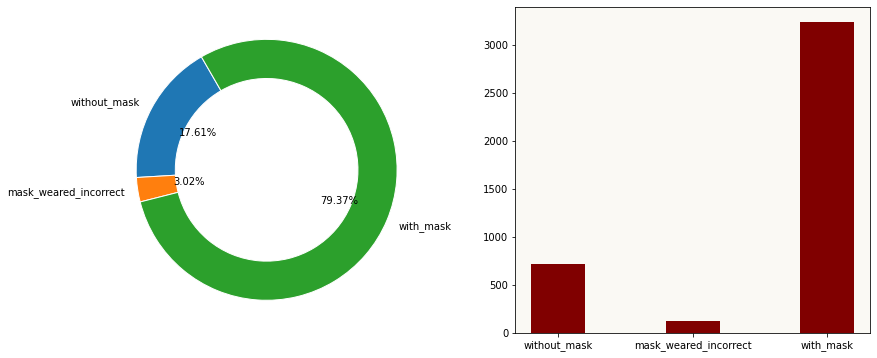

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
background_color = '#faf9f4'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color) 
ax1.pie(count, wedgeprops=dict(width=0.3, edgecolor='w') ,
        labels=labels, radius=1, startangle = 120, autopct='%1.2f%%')

ax2 = plt.bar(labels, list(count),
              color ='maroon',width = 0.4)

plt.show()
